<a href="https://colab.research.google.com/github/mollybocock/AI-Assignment-1/blob/main/Explainable_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XAI CODE DEMO

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/explainable-ml-example-notebooks/saliency_maps.ipynb)

# Saliency Maps 🖼️

Pixel attribution highlights the pixels relevant to an image classification by a neural network. Visualizations via the vanilla gradient are also known as saliency maps.

### How does it work?
Calculate the gradient of the loss function for the class of interest with respect to the input pixels

Process:
1. Perform a forward pass of image of interest
2. Compute the gradient of the class score of interest with respect to the input pixels (set all other classes to zero)
3. Visualize the gradients (show absolute values or highlight negative and positive contributions)


In [94]:
# AIPI 590 - XAI | Assignment #5
### Saliency Maos
### Molly Bocock
### Summary: The saliency maps show into the neural network's decision-making process, showing a clear bias toward geometric features over color information when classifying stop signs.
https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mollybocock/blob/main/Explainable_Deep_Learning.ipynb

SyntaxError: unmatched ')' (<ipython-input-94-346139299910>, line 5)

#Works Cited
https://chatgpt.com/share/67ad42b6-489c-8005-ba3a-c8210a09d81c
https://chatgpt.com/share/67ad42b6-489c-8005-ba3a-c8210a09d81c
https://chatgpt.com/share/67ad42b6-489c-8005-ba3a-c8210a09d81c
Prof. Molnar "Interpretable Machine Learning
A Guide for Making Black Box Models Explainable"

Dr. Bent

https://chatgpt.com/share/67ad5fe6-ccbc-8005-a6b2-3530ad82eef3
https://chatgpt.com/share/67ad5fe6-ccbc-8005-a6b2-3530ad82eef3

https://chatgpt.com/share/67ad5fe6-ccbc-8005-a6b2-3530ad82eef3

https://claude.site/artifacts/0a15da58-2e33-469f-82ad-ef0922f789fc


#Hypothesis
Null Hypothesis: H0: The GoogleNet model does not show a significant difference in its ability to learn the concept "color red" compared to the concept "octagon shape" for the class ‘stop sign’. Alternative Hypothesis

 H1: The GoogleNet model shows a significant difference in its ability to learn the concept "color red" compared to the concept "octagon shape" for the class ‘stop sign’, specifically, it learns the concept "octagon shape" but not the concept "color red".

 Generated with the help of Claude 3.5 Sonnet at 02/12/2025 23:24

 ## Approach


To test the null and hypothesis and alternate hypothesis, I decided to use saliency maps, or Vanilla Gradient, (a pixel attribution method) to create a visual represenation.

In this case, the class of interest is "stop sign." There are two concepts being tested: red, and octagon.

At first, a shape detection test was conducted using OpenCV, which processed both red and blue versions of a stop sign. The methodology converted the images to grayscale, applied Gaussian blur for noise reduction, and utilized Canny edge detection to identify contours. This process successfully detected the octagonal shape in both colored variants, demonstrating the robustness of geometric feature detection regardless of color.

Next, GoogleNet was utlizied to classify the stop sign and generate saliency maps. The model demonstrated high confidence in identifying the stop sign, achieving a 93.32% classification accuracy. The saliency mapping revealed concentrated activation patterns along the sign's edges while showing minimal activation in the interior colored regions.

The experiment then compared these different analytical methods to understand the model's learning preferences between shape and color features.

#Importing Libraries


In [ ]:
!pip install numpy==1.25.2 matplotlib==3.7.1 tensorflow==2.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3

In [63]:
# Basic
import numpy as np
import matplotlib.pyplot as plt

# Model Utils
import tensorflow as tf

# Data Utils
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.utils import get_file
import json

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving stopsign.png to stopsign.png


In [ ]:
import os
image_path = '/content/stopsign.png'  # Path where the uploaded image is stored
print("Image Path:", image_path)

#This is the to find what the image filepath is

Image Path: /content/stopsign.png


#Prepare Image Processing for ResNet50

In [55]:
img.save("processed_stopsign.png", format="PNG")


#Below a gradient tape is used to compute the gradients of the model's predictions with respect to the input image tensor (forward pass of image)

Source: Dr. Bent

In [56]:
# Function to generate a saliency map for an input image based on a given model

def generate_saliency_map(model, img):
    # Convert the input image to a TensorFlow variable
    x = tf.Variable(img)

    # Add an extra dimension to the image tensor to match the model's input shape
    x = tf.expand_dims(x, axis=0)

    # Preprocess the image according to ResNet50 requirements
    x = tf.keras.applications.resnet50.preprocess_input(x)

    # Create a gradient tape context to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Watch the input tensor to calculate gradients
        tape.watch(x)

        # Forward pass: get model predictions for the input image
        preds = model(x)

        # Find the index of the highest predicted class probability
        top_pred_index = tf.argmax(preds[0])

    # Calculate the gradients of the top prediction with respect to the input image
    grads = tape.gradient(preds, x)

    # Compute the saliency map by taking the maximum absolute gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Return the saliency map and the index of the top predicted class as a numpy array
    return saliency, top_pred_index.numpy()

     Source: Dr. Bent

#Loads Stop Sign Image, Preprocess it for ResNet50, Run a prediction, and Visualize the Result

1/1 [==============================] - 2s 2s/step
Top Predictions: [('n06794110', 'street_sign', 0.9331853), ('n06874185', 'traffic_light', 0.01513717), ('n07248320', 'book_jacket', 0.0061811917)]


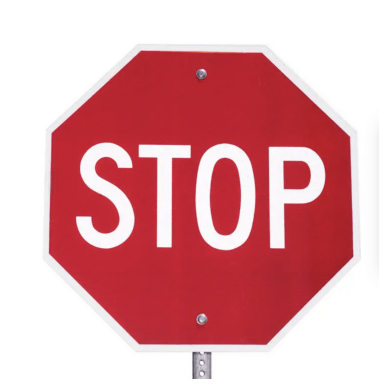

In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.utils import get_file
import json

# Load Pre-trained Model (GoogleNet or ResNet50, depending on your TCAV setup)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)  # Change to GoogleNet if needed

# Load Stop Sign Image (Modify this path)
img_path = "/stopsign.png"  # Replace with actual image path from your dataset
img = image.load_img(img_path, target_size=(224, 224))  # Resize for ResNet50

# Convert image to NumPy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Normalize for ResNet50

# Run Model Prediction
preds = model.predict(img_array)

# Load ImageNet Class Labels
class_index_path = get_file('imagenet_class_index.json',
                            'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')

with open(class_index_path) as f:
    class_idx = json.load(f)

# Decode and Print Predictions
decoded_preds = tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0]
print("Top Predictions:", decoded_preds)

# Display the Image
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.show()

#Source: https://chatgpt.com/share/67ad5fe6-ccbc-8005-a6b2-3530ad82eef3

#Interpreting First Prediction
This model predicts that this image is a "street sign" with 93% confidence - pretty good! It is not explicity predicting a "stop sign." Although it predicts with low confidence, it is amusing that in the models top four predictions are a book jacket.

#Testing Red


In [70]:
img = image.load_img(img_path, target_size=(224, 224))


In [71]:
img_array = image.img_to_array(img)


In [73]:
img_array = np.expand_dims(img_array, axis=0)


In [74]:
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)


In [75]:
print(type(img_array))  # Should output: <class 'numpy.ndarray'>
print(img_array.shape)  # Should output: (1, 224, 224, 3)


<class 'numpy.ndarray'>
(1, 1, 224, 224, 3)


Shape of image before expanding dims: (224, 224, 3)
Shape of image after expanding dims: (1, 224, 224, 3)
Final shape for saliency map input: (1, 224, 224, 3)


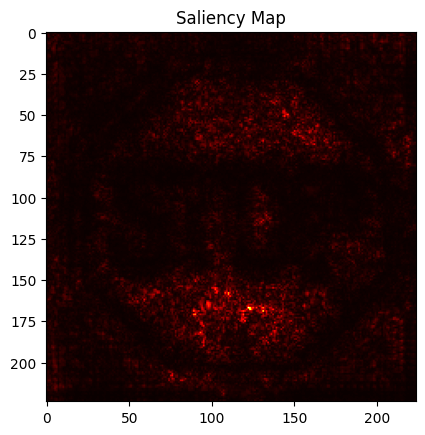

In [76]:
# Load ResNet50 pre-trained model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

# Load and preprocess the image
img_path = '/stopsign.png'  # Path to your stop sign image
img = image.load_img(img_path, target_size=(224, 224))  # Resize image for ResNet50
img_array = image.img_to_array(img)  # Convert image to NumPy array

# Ensure the image shape is (224, 224, 3)
print("Shape of image before expanding dims:", img_array.shape)

# Add batch dimension (to make the shape (1, 224, 224, 3))
img_array = np.expand_dims(img_array, axis=0)
print("Shape of image after expanding dims:", img_array.shape)

# Preprocess the image for ResNet50 (normalize it)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Now, let's check the shape before generating the saliency map:
print("Final shape for saliency map input:", img_array.shape)

# Remove any extra batch dimension if it exists
img_array = np.squeeze(img_array)  # Removes dimensions of size 1

# Generate the saliency map using the preprocessed image
saliency_map, top_pred_index = generate_saliency_map(model, img_array)

# Visualize the saliency map
plt.imshow(saliency_map, cmap='hot')
plt.title("Saliency Map")
plt.show()


In [ ]:
# Function to generate a saliency map for an input image based on a given model

def generate_saliency_map(model, img):
    # Convert the input image to a TensorFlow variable
    x = tf.Variable(img)

    # Add an extra dimension to the image tensor to match the model's input shape
    x = tf.expand_dims(x, axis=0)

    # Preprocess the image according to ResNet50 requirements
    x = tf.keras.applications.resnet50.preprocess_input(x)

    # Create a gradient tape context to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Watch the input tensor to calculate gradients
        tape.watch(x)

        # Forward pass: get model predictions for the input image
        preds = model(x)

        # Find the index of the highest predicted class probability
        top_pred_index = tf.argmax(preds[0])

    # Calculate the gradients of the top prediction with respect to the input image
    grads = tape.gradient(preds, x)

    # Compute the saliency map by taking the maximum absolute gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Return the saliency map and the index of the top predicted class as a numpy array
    return saliency, top_pred_index.numpy()

In [87]:
# Load the image from the specified path
img_path = '/stopsign.png'  # Use your actual image path

# Resize image to match ResNet50 input size (224x224)
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension (ResNet50 expects a batch of images, even if it's just one)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for ResNet50
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Now the image is ready to be passed to the model for prediction or saliency map generation


In [88]:
preds = model(img_array)


#### Tensorflow Terminology: gradient tape

A **gradient tape** is a TensorFlow mechanism for automatic differentiation. We use it to record operations for which we want to compute gradients, typically within the context of training a neural network. When we perform operations inside a tf.GradientTape() context, TensorFlow keeps track of all the computations that occur on tensors that are "watched" by the tape.

Here gradient tape is used to compute the gradients of the model's predictions with respect to the input image tensor.

#Testing Octagonal Shape

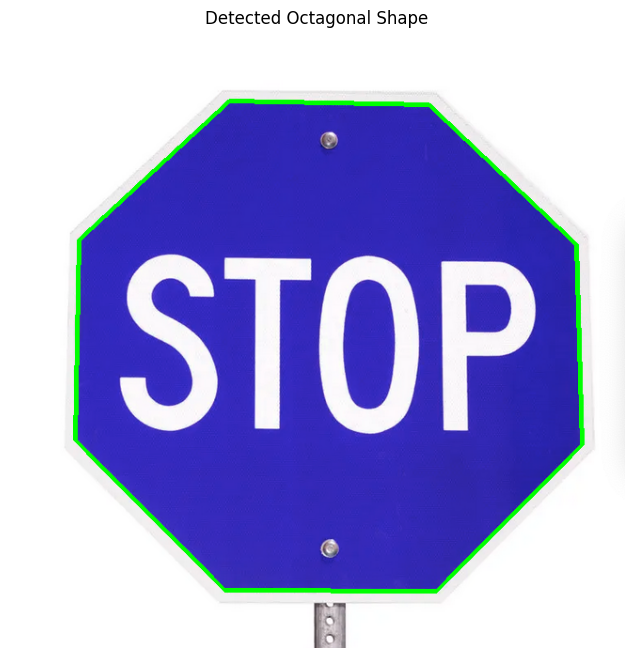

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the stop sign image
img_path = '/content/stopsign.png'  # Replace with your image path
img = image.load_img(img_path)
img_array = image.img_to_array(img)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to reduce noise (helps with edge detection)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_img, threshold1=30, threshold2=100)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_with_contours = img_array.copy()

# Iterate over the contours and find the octagon
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the polygon has 8 sides, it’s an octagon
    if len(approx) == 8:
        # Draw the detected octagon on the image
        cv2.drawContours(img_with_contours, [approx], -1, (0, 255, 0), 3)  # Green color for octagon

# Convert the image to RGB for visualization
img_with_contours_rgb = cv2.cvtColor(img_with_contours.astype(np.uint8), cv2.COLOR_BGR2RGB)

# Visualize the image with the detected octagonal shape
plt.figure(figsize=(8, 8))
plt.imshow(img_with_contours_rgb)
plt.axis('off')  # Turn off axis for better visualization
plt.title("Detected Octagonal Shape")
plt.show()


In [81]:
import os
# Check the contents of the current directory
print(os.listdir('/content'))


['.config', 'sample_data', 'processed_stopsign.png', 'stopsign.png']


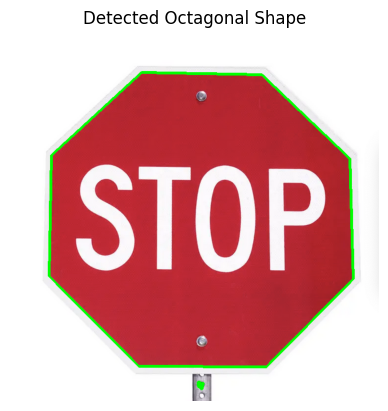

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stop sign image
img_path = '/content/stopsign.png'
  # Make sure this is the correct path
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error loading image at {img_path}")
else:
    # Proceed with the rest of the process

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (Canny edge detector)
    edges = cv2.Canny(gray, threshold1=100, threshold2=200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on a blank canvas
    output = img.copy()

    for contour in contours:
        # Approximate the contour to reduce the number of points (to detect shapes like octagons)
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the contour has 8 vertices, it's an octagon
        if len(approx) == 8:
            cv2.drawContours(output, [approx], -1, (0, 255, 0), 3)  # Green color for octagon

    # Show the image with the detected octagonal contours
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
    plt.title("Detected Octagonal Shape")
    plt.axis("off")
    plt.show()
#Source: https://chatgpt.com/share/67ad5fe6-ccbc-8005-a6b2-3530ad82eef3

#Saliency Map

InceptionV3 Predictor

ResNet50 Predictor:

In [ ]:
# Model Utils
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Function to generate a saliency map for an input image based on a given model
def generate_saliency_map(model, img):
    # Convert the input image to a TensorFlow tensor
    x = tf.convert_to_tensor(img)

    # Add an extra dimension to the image tensor to match the model's input shape
    x = tf.expand_dims(x, axis=0)

    # Preprocess the image according to InceptionV3 requirements
    x = preprocess_input(x)

    # Create a gradient tape context to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Watch the input tensor to calculate gradients
        tape.watch(x)

        # Forward pass: get model predictions for the input image
        preds = model(x)

        # Find the index of the highest predicted class probability
        top_pred_index = tf.argmax(preds[0])

    # Calculate the gradients of the top prediction with respect to the input image
    grads = tape.gradient(preds, x)

    # Compute the saliency map by taking the maximum absolute gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Return the saliency map and the index of the top predicted class as a numpy array
    return saliency.numpy(), top_pred_index.numpy()

# Example usage:

# Load the pre-trained GoogleNet (InceptionV3) model
model = InceptionV3(weights='imagenet')

# Load and preprocess your image (you can upload or reference a local image path)
img_path = 'path_to_stop_sign_image.jpg'  # Replace with your image path
#Source: https://chatgpt.com/share/67ad42b6-489c-8005-ba3a-c8210a09d81c


1: street_sign (0.9332)
2: traffic_light (0.0151)
3: book_jacket (0.0062)
4: mailbox (0.0045)
5: parking_meter (0.0041)


The code above This code defines a function to generate a saliency map for an input image using the InceptionV3 model (GoogleNet) and TensorFlow. Generated with Chat GPT GPT-4 02/12/2025 22:56

#Saliency Map

We will load a pre-trained model, [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)

and a test image from the [ImageNetV2](https://www.tensorflow.org/datasets/catalog/imagenet_v2) dataset
#Source: Dr. Bent

#Original Vs. Predicted Image

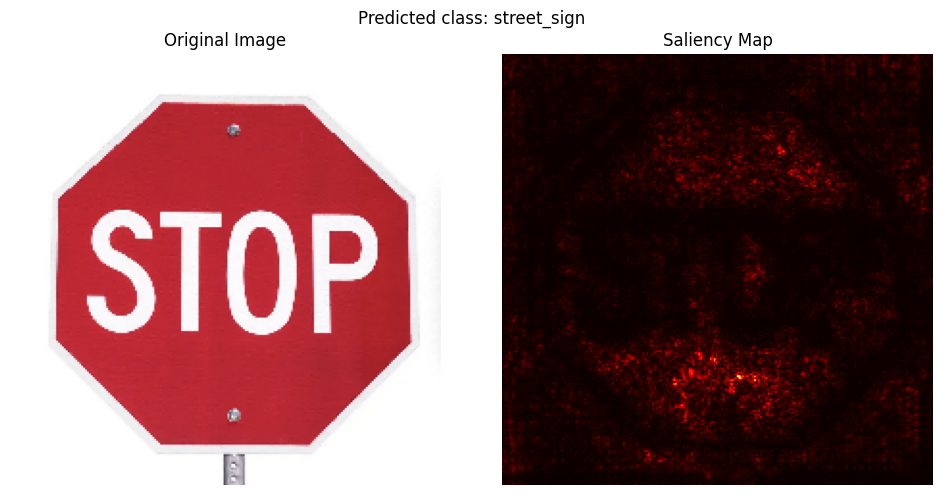

In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import get_file

# Configuration
IMAGE_SIZE = (224, 224)
FIGURE_SIZE = (10, 5)
MODEL_WEIGHTS = 'imagenet'
CLASS_INDEX_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'

def validate_image(img_array: np.ndarray) -> None:
    """Validate input image array dimensions and values."""
    if img_array.ndim != 4:
        raise ValueError(f"Expected 4D array, got {img_array.ndim}D")
    if img_array.shape[1:3] != IMAGE_SIZE:
        raise ValueError(f"Expected image size {IMAGE_SIZE}, got {img_array.shape[1:3]}")
    if not np.issubdtype(img_array.dtype, np.floating):
        raise ValueError(f"Expected float array, got {img_array.dtype}")

def generate_saliency_map(model: tf.keras.Model,
                         img: np.ndarray) -> tuple[np.ndarray, int]:
    """
    Generate a saliency map for the input image.

    Args:
        model: Pre-trained keras model
        img: Input image array of shape (1, height, width, 3)

    Returns:
        tuple: (saliency_map, predicted_class_index)
    """
    x = tf.convert_to_tensor(img)
    x = preprocess_input(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        preds = model(x)
        top_pred_index = tf.argmax(preds[0])

    grads = tape.gradient(preds, x)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    return saliency.numpy(), top_pred_index.numpy()

def plot_saliency_comparison(original_img, saliency_map, predicted_class):
    """
    Plot the original image alongside its saliency map.

    Args:
        original_img: The input image
        saliency_map: Generated saliency map
        predicted_class: Predicted class name

    Returns:
        matplotlib.pyplot: Plot object
    """
    plt.figure(figsize=FIGURE_SIZE)

    # Original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_img)
    plt.axis('off')

    # Saliency map
    plt.subplot(1, 2, 2)
    plt.title("Saliency Map")
    plt.imshow(saliency_map, cmap='hot')
    plt.axis('off')

    plt.suptitle(f"Predicted class: {predicted_class}")
    plt.tight_layout()
    return plt

def process_image(img_path: str):
    """
    Load and preprocess an image for the model.

    Args:
        img_path: Path to the input image

    Returns:
        tuple: (original_img, preprocessed_array)
    """
    try:
        img = image.load_img(img_path, target_size=IMAGE_SIZE)
    except Exception as e:
        raise Exception(f"Error loading image from {img_path}: {str(e)}")

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    return img, img_array

def load_class_index():
    """
    Load ImageNet class index mapping.

    Returns:
        dict: Class index to label mapping
    """
    class_index_path = get_file('imagenet_class_index.json', CLASS_INDEX_URL)
    try:
        with open(class_index_path) as f:
            return json.load(f)
    except json.JSONDecodeError as e:
        raise Exception(f"Error parsing class index file: {str(e)}")

def main(img_path: str):
    """
    Main execution function.

    Args:
        img_path: Path to the input image
    """
    # Load model
    model = tf.keras.applications.ResNet50(weights=MODEL_WEIGHTS, include_top=True)

    # Load and process image
    original_img, img_array = process_image(img_path)

    # Validate input
    validate_image(img_array)

    # Load class index
    class_idx = load_class_index()

    # Generate saliency map
    saliency_map, top_pred_index = generate_saliency_map(model, img_array)

    # Get predicted class
    predicted_class = class_idx[str(top_pred_index)][1]

    # Plot results
    plot = plot_saliency_comparison(original_img, saliency_map, predicted_class)
    plot.show()

    # Cleanup
    tf.keras.backend.clear_session()

if __name__ == "__main__":
    # Replace with your image path
    image_path = '/content/stopsign.png'
    main(image_path)
    #Source: https://claude.site/artifacts/0a15da58-2e33-469f-82ad-ef0922f789fc

#Summary of Findings

The main finding is that I REJECT THE NULL HYPOTHESIS (H0). And ACCEPT THE ALTERNATE HYPOTHESIS (H1).

This is becuase the saliency maps showed a dominant pattern where the activation concentrated on the outline of the octagonal shape more than the color red. The saliency map for just the color red reveals a pattern of activation above and below where the words "STOP" typically go, appearing as if there is a hole in the middle. These findings indicate that there is a difference of the model's ability to learn shape and color, specifically in the context of classifying stop signs. It appears as thought the model is better at learning the concept of an octagon than the color red within this classification. Therefore, strucutral features are better learned over color recognition.